---

# Region Masking

---

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Read in the sample image and print some stats

In [2]:
image = mpimg.imread('1-Test-Image-for-Lane-Lines.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


### Sample Image
> The sample image to work on finding lane lines
1-Test-Image-for-Lane-Lines.jpg

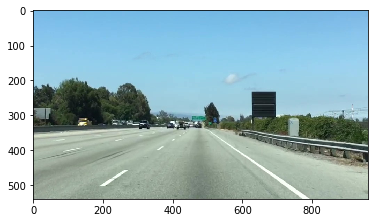

In [3]:
plt.imshow(image)
plt.show()

### Pull out the x and y sizes and make a copy of the image

In [4]:
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

### Define a triangle region of interest 

In [5]:
left_bottom = [0, 539]
right_bottom = [959, 539]
apex = [470, 330]

### Fit Lines

Fit lines (y=Ax+B) to identify the  3 sided region of interest 

p.polyfit() returns the coefficients [A, B] of the fit

In [6]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

print('fit_left =' , fit_left)
print('fit_right =' , fit_right)
print('fit_bottom =' , fit_bottom)

fit_left = [ -4.44680851e-01   5.39000000e+02]
fit_right = [   0.42740286  129.1206544 ]
fit_bottom = [ -5.92736380e-17   5.39000000e+02]


### Find the region inside the lines

In [7]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))


### Color pixels red which are inside the region of interest

In [8]:
region_select[region_thresholds] = [255, 0, 0]

### Display the image

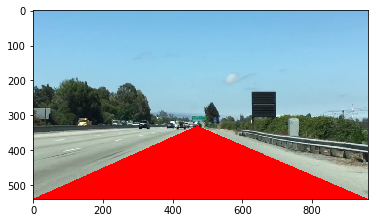

In [ ]:
plt.imshow(region_select)
plt.show()

In [ ]:
mpimg.imsave("2-Region-Masking-Code-Result.png", region_select)